<a href="https://colab.research.google.com/github/Ranya-Alghamdi-1/T5/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load the Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/T5/Week 3-DB/1-Weekly Task-20240811T051244Z-001/1-Weekly Task/Datasets/Traffic_Accidents.csv')
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [6]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [7]:
df.describe(include='object')

,Date,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident
count,52000,52000,52000,52000,52000,51456,52000,52000,52000
unique,3286,206,6,3,6,5,9,6,2
top,04/11/2005,E10000016,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes
freq,43,1465,38852,51718,43368,37734,41662,35727,42143


In [10]:
df_shape = df.shape
print(df_shape)

(52000, 26)


In [11]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [12]:
df.duplicated().sum()

43

In [13]:
#Drop the duplicate values
df.drop_duplicates(inplace=True)

In [14]:
print("\nUnique values in object columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique values in object columns:
Date: 3286 unique values
Local_Authority_(Highway): 206 unique values
Road_Type: 6 unique values
Pedestrian_Crossing-Human_Control: 3 unique values
Pedestrian_Crossing-Physical_Facilities: 6 unique values
Light_Conditions: 5 unique values
Weather_Conditions: 9 unique values
Road_Surface_Conditions: 6 unique values
Did_Police_Officer_Attend_Scene_of_Accident: 2 unique values


In [15]:
print("\nUnique values in columns:")
for column in df.select_dtypes(include=['int']).columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique values in columns:
Police_Force: 51 unique values
Number_of_Vehicles: 13 unique values
Day_of_Week: 7 unique values
Local_Authority_(District): 416 unique values
1st_Road_Class: 6 unique values
1st_Road_Number: 3584 unique values
Speed_limit: 7 unique values
2nd_Road_Class: 7 unique values
2nd_Road_Number: 2837 unique values
Year: 9 unique values


In [16]:
print("\nUnique values in columns:")
for column in df.select_dtypes(include=['float']).columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique values in columns:
Location_Easting_OSGR: 30693 unique values
Location_Northing_OSGR: 32580 unique values
Longitude: 50901 unique values
Latitude: 50701 unique values
Accident_Severity: 3 unique values
Number_of_Casualties: 19 unique values
Urban_or_Rural_Area: 3 unique values


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

# Impute missing

In [22]:
df['Accident_Severity'].unique()
#Remove the nan then fill with mode
df['Accident_Severity'] = df['Accident_Severity'].replace('nan', np.nan)
df['Accident_Severity'] = df['Accident_Severity'].fillna('1')
df['Accident_Severity'] = df['Accident_Severity'].replace('1', np.nan)
df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0], inplace=True)

In [23]:
df['Number_of_Casualties'].unique()
df['Number_of_Casualties'] = df['Number_of_Casualties'].replace('nan', np.nan)
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna('1')
df['Number_of_Casualties'] = df['Number_of_Casualties'].replace('1', np.nan)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mode()[0], inplace=True)

In [24]:
df['Light_Conditions'].unique()
df['Light_Conditions'].unique()
df['Light_Conditions'] = df['Light_Conditions'].replace('nan', np.nan)
df['Light_Conditions'] = df['Light_Conditions'].fillna('Darkness')
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness', np.nan)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)

In [25]:
df['Urban_or_Rural_Area'].unique()
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace('nan', np.nan)
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna('1')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace('1', np.nan)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0], inplace=True)

In [26]:
#Check again
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


# Scale the data

# Remove the outliers

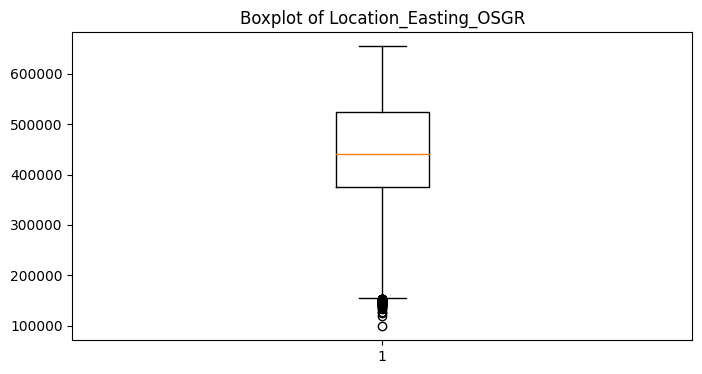

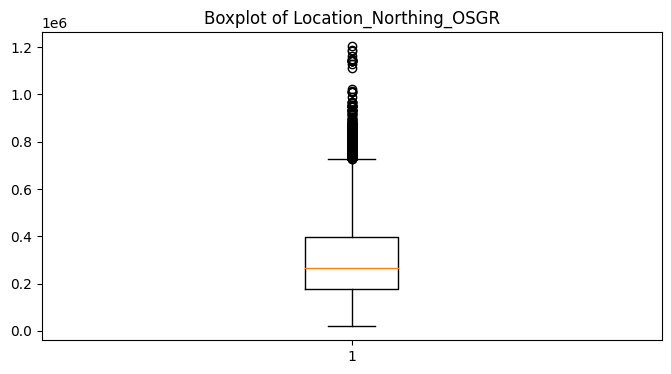

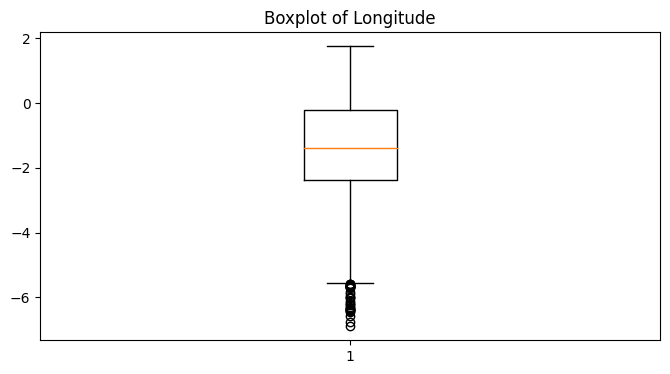

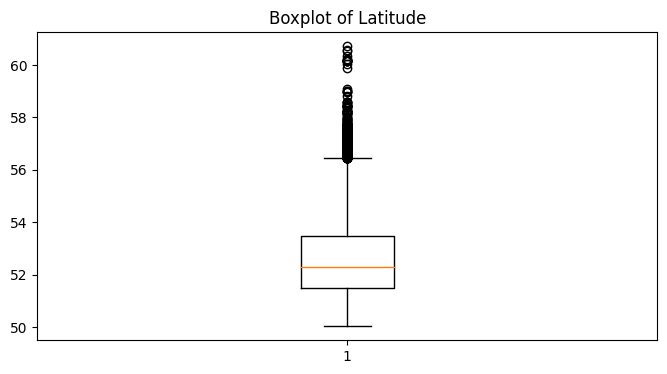

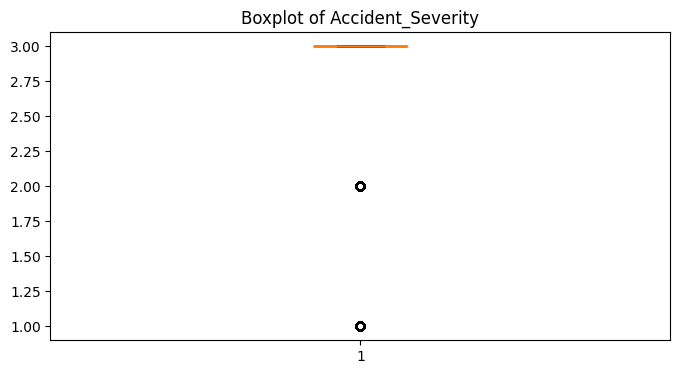

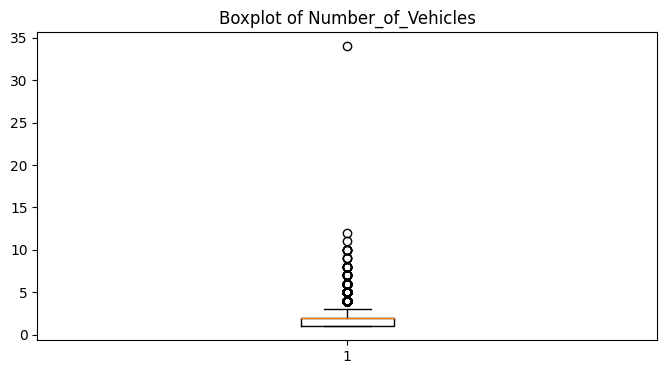

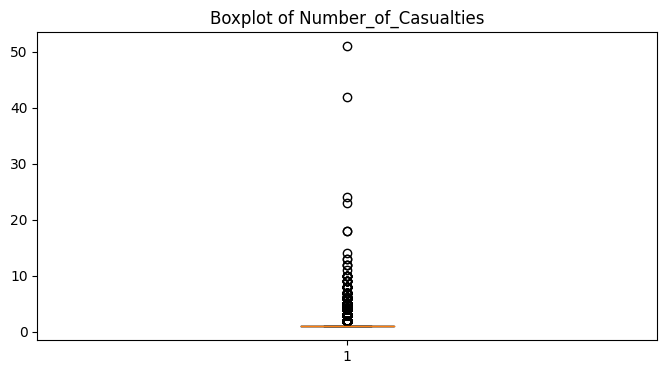

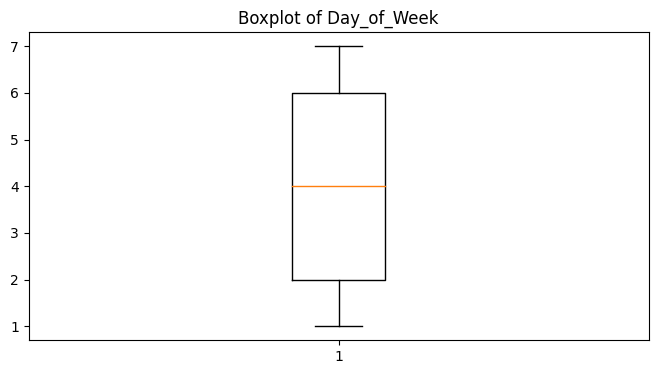

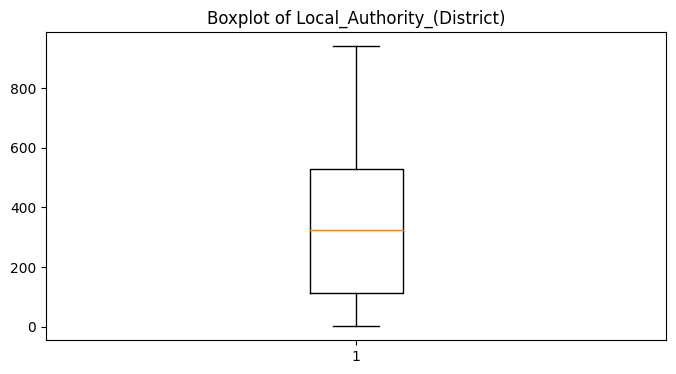

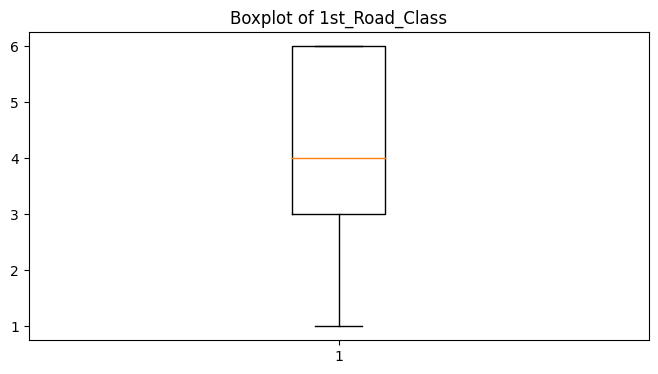

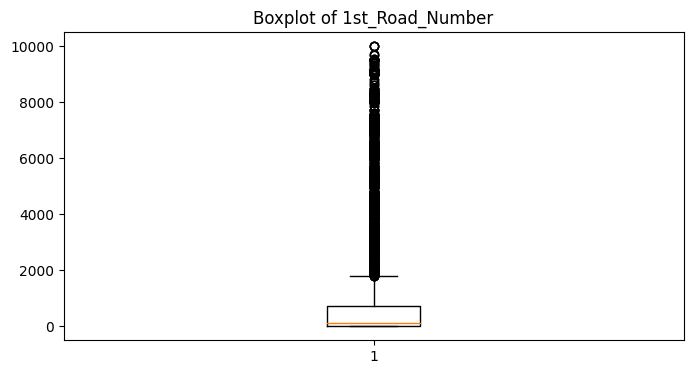

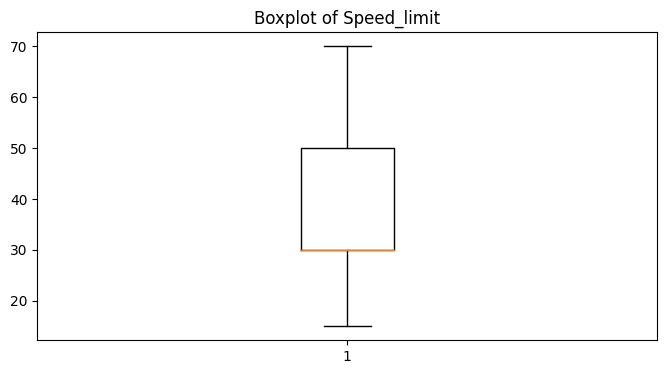

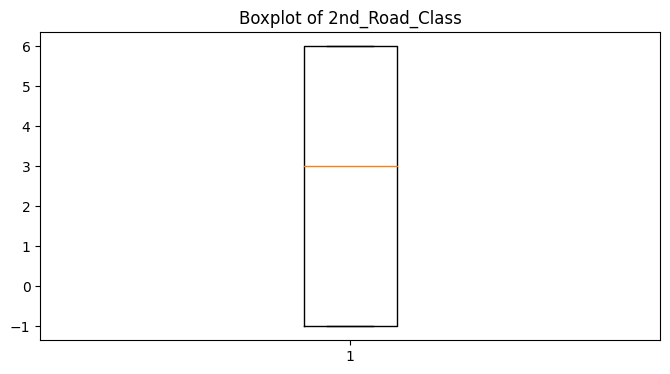

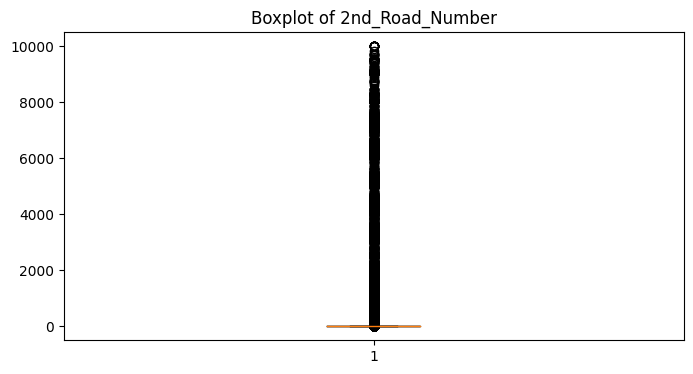

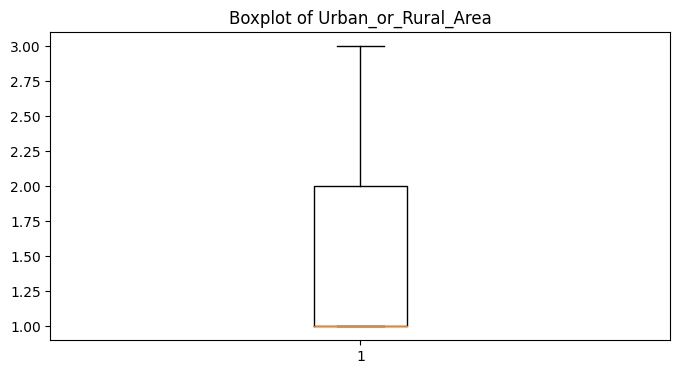

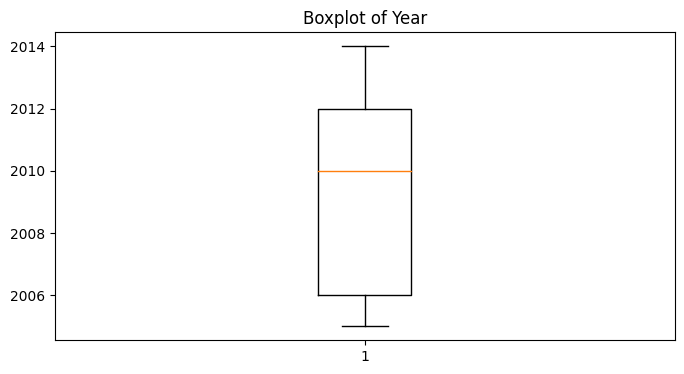

In [28]:
numeric_columns = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                   'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties','Day_of_Week','Local_Authority_(District)','1st_Road_Class',
                   '1st_Road_Number','Speed_limit','2nd_Road_Class','2nd_Road_Number','Urban_or_Rural_Area','Year']
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())
    plt.show()

In [48]:
# Remove the outliers by IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
columns_to_check =['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                   'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties','2nd_Road_Number']
df_noOutliers = remove_outliers(df, columns_to_check)
print("after removing outliers:")
print(df_noOutliers.describe())

after removing outliers:
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           25549.000000            25549.000000  25549.000000   
mean           440541.299933           287249.595561     -1.423475   
std             97909.515744           152636.792125      1.435043   
min            154240.000000            19400.000000     -5.473363   
25%            369360.000000           175030.000000     -2.457150   
50%            441980.000000           242700.000000     -1.381283   
75%            526520.000000           394720.000000     -0.175909   
max            654690.000000           724160.000000      1.749605   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  25549.000000  25549.000000            25549.0        25549.000000   
mean      52.472848     29.777447                3.0            1.714940   
std        1.374903     25.576130                0.0            0.580559   
min       50.029199      1.000000       

In [49]:
df_noOutliers.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,25549.000000,25549.000000,25549.000000,25549.000000,25549.000000,25549.0,25549.000000,25549.0,25549.000000,25549.000000,25549.000000,25549.000000,25549.000000,25549.000000,25549.0,25549.000000,25549.000000
mean,440541.299933,287249.595561,-1.423475,52.472848,29.777447,3.0,1.714940,1.0,4.144507,344.650319,4.258405,900.872480,37.768014,2.502094,0.0,1.315120,2009.415476
std,97909.515744,152636.792125,1.435043,1.374903,25.576130,0.0,0.580559,0.0,1.894783,261.595329,1.460829,1706.980627,13.651117,3.472753,0.0,0.464657,3.016412
min,154240.000000,19400.000000,-5.473363,50.029199,1.000000,3.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,0.0,1.000000,2005.000000
25%,369360.000000,175030.000000,-2.457150,51.461227,6.000000,3.0,1.000000,1.0,3.000000,102.000000,3.000000,0.000000,30.000000,-1.000000,0.0,1.000000,2006.000000
50%,441980.000000,242700.000000,-1.381283,52.060737,30.000000,3.0,2.000000,1.0,4.000000,309.000000,4.000000,61.000000,30.000000,5.000000,0.0,1.000000,2010.000000
75%,526520.000000,394720.000000,-0.175909,53.447316,46.000000,3.0,2.000000,1.0,6.000000,536.000000,6.000000,643.000000,40.000000,6.000000,0.0,2.000000,2012.000000
max,654690.000000,724160.000000,1.749605,56.394270,98.000000,3.0,3.000000,1.0,7.000000,940.000000,6.000000,9999.000000,70.000000,6.000000,0.0,3.000000,2014.000000


# Scale the data

In [50]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Police_Force',	'Accident_Severity',
                    'Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Local_Authority_(District)','1st_Road_Class','1st_Road_Number',
                    'Speed_limit','2nd_Road_Class','2nd_Road_Number','Urban_or_Rural_Area','Year']
#df basic
#df1 without outliers
#df_scaled after scaling

#نسخة 2 من داتا
df_scaled = df_noOutliers.copy()

scaler = StandardScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale]) # Scale only the specified columns
print("Data after scaling:")
print(df_scaled[columns_to_scale].describe())

Data after scaling:
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           2.554900e+04            2.554900e+04  2.554900e+04   
mean            1.120783e-16           -1.413493e-16 -6.062794e-17   
std             1.000020e+00            1.000020e+00  1.000020e+00   
min            -2.924199e+00           -1.754851e+00 -2.822193e+00   
25%            -7.270253e-01           -7.352211e-01 -7.203236e-01   
50%             1.469447e-02           -2.918724e-01  2.940189e-02   
75%             8.781617e-01            7.041062e-01  8.693752e-01   
max             2.187253e+00            2.862475e+00  2.211183e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  2.554900e+04  2.554900e+04            25549.0        2.554900e+04   
mean  -2.971881e-15 -3.907443e-17                0.0       -1.974580e-17   
std    1.000020e+00  1.000020e+00                0.0        1.000020e+00   
min   -1.777360e+00 -1.125190e+00            

# PCA

In [51]:
from sklearn.decomposition import PCA

# اختيار الأعمدة الجغرافية والعددية فقط  PCA
geographical_columns = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                        'Number_of_Vehicles', 'Number_of_Casualties', 'Accident_Severity']
#اذا كان في عمود مو عددي بينحذف
df_pca = df_noOutliers[geographical_columns].dropna()

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


# Implement One-Hot Encoding for nominal categorical variables

In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_columns = ['Road_Type',
                       'Pedestrian_Crossing-Human_Control',
                       'Pedestrian_Crossing-Physical_Facilities',
                       'Weather_Conditions',
                       'Road_Surface_Conditions',
                       'Did_Police_Officer_Attend_Scene_of_Accident',
                       'Light_Conditions']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_columns)
    ],
    remainder='passthrough'  # ترك الأعمدة الأخرى
)

df_encoded = preprocessor.fit_transform(df_noOutliers)
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

df_encoded.head()


,cat__Road_Type_Dual carriageway,cat__Road_Type_One way street,cat__Road_Type_Roundabout,cat__Road_Type_Single carriageway,cat__Road_Type_Slip road,cat__Road_Type_Unknown,cat__Pedestrian_Crossing-Human_Control_Control by other authorised person,cat__Pedestrian_Crossing-Human_Control_Control by school crossing patrol,cat__Pedestrian_Crossing-Human_Control_None within 50 metres,cat__Pedestrian_Crossing-Physical_Facilities_Central refuge,...,remainder__Day_of_Week,remainder__Local_Authority_(District),remainder__Local_Authority_(Highway),remainder__1st_Road_Class,remainder__1st_Road_Number,remainder__Speed_limit,remainder__2nd_Road_Class,remainder__2nd_Road_Number,remainder__Urban_or_Rural_Area,remainder__Year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6,556,E10000011,3,22,70,-1,0,2.0,2009
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,26,E09000017,4,466,30,6,0,1.0,2010
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5,228,E06000010,6,0,30,6,0,1.0,2006
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4,307,E08000030,3,463,30,6,0,1.0,2006
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6,129,E06000049,3,50,30,6,0,2.0,2014


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


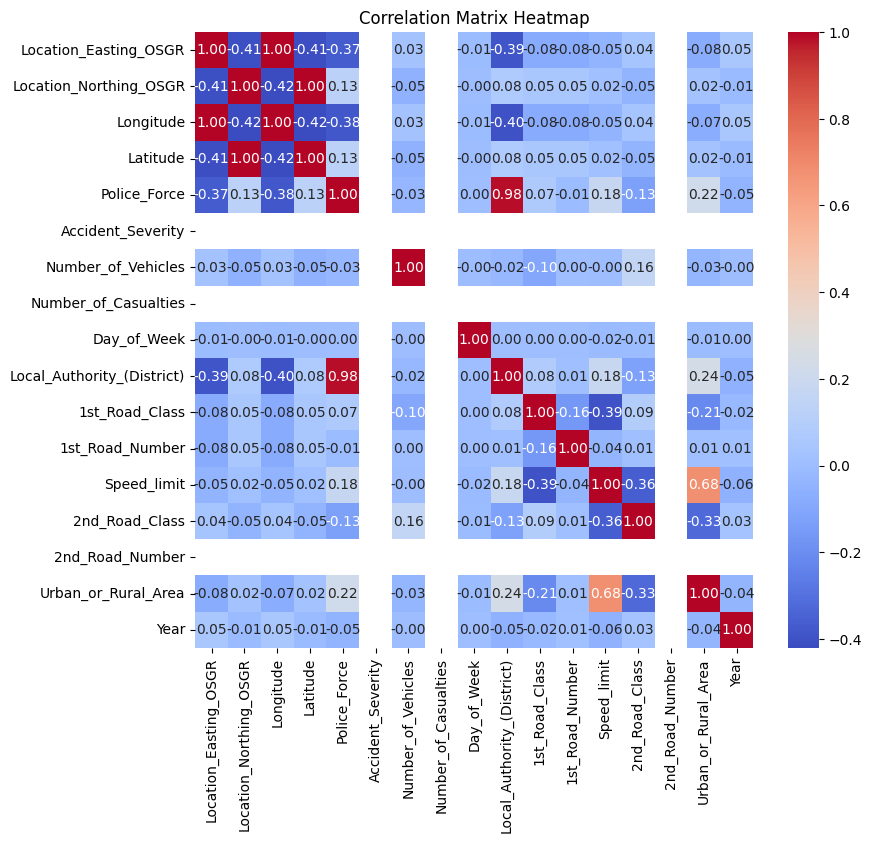

In [63]:
# Extract numerical features for correlation analysis
numerical_features = df_scaled.select_dtypes(include=['number'])

# Calculate the correlation matrix on numerical features only
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

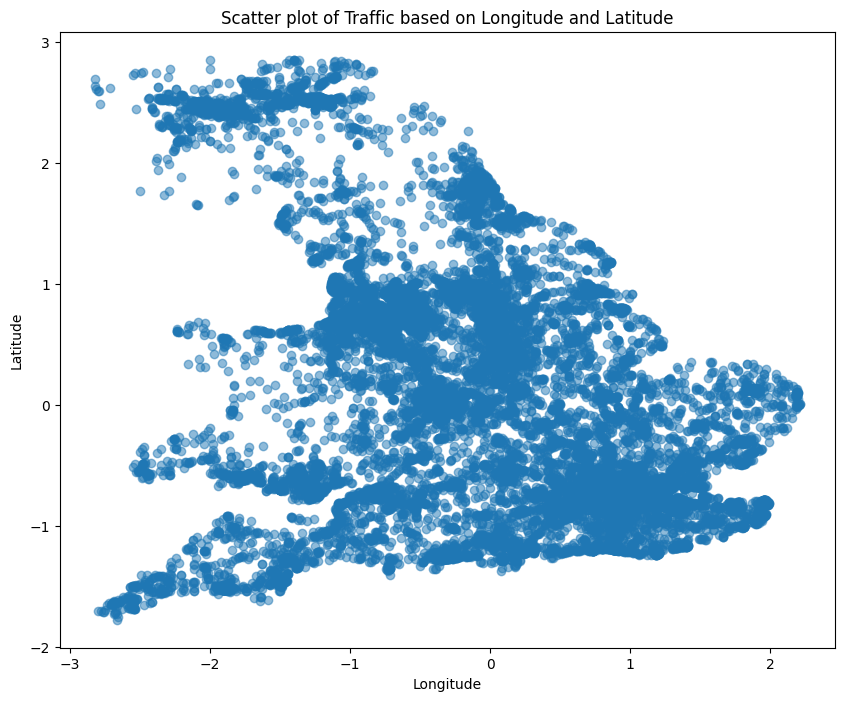

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled['Longitude'], df_scaled['Latitude'], alpha=0.5)  # alpha controls the transparency of the points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Traffic based on Longitude and Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)  # Inertia تمثل WCSS

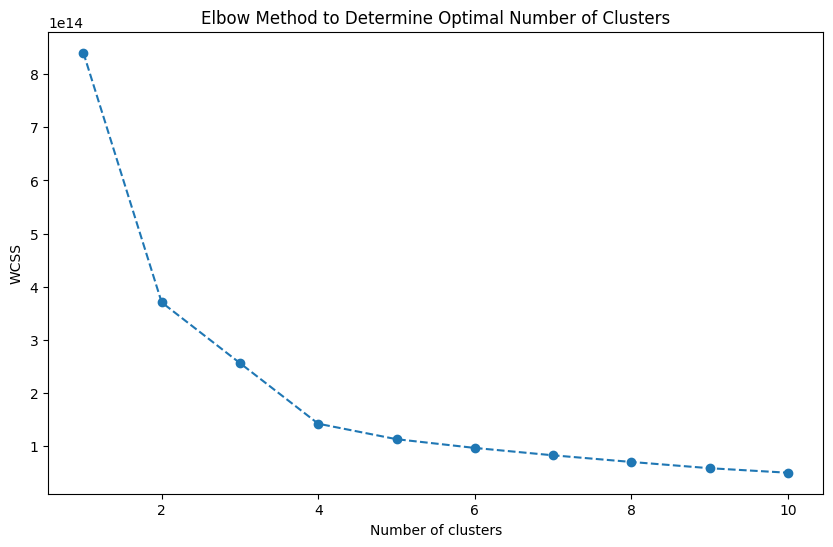

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

print("Cluster centers:")
print(kmeans.cluster_centers_)

df_pca.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers:
[[-125803.62582465  -48798.43809764]
 [ 177901.58712574  -10299.52174557]
 [ -55102.84815302  116956.63624896]]


,PC1,PC2,Cluster
0,-213975.538864,-47015.940382,0
1,-117825.573906,-28293.185789,0
2,109265.024767,-113957.653330,1
3,25280.867902,37088.066239,2
4,89193.300950,30842.417569,1


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [71]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_pca, df_pca['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')
# يقيس مدى التجميع من خلال تقييم مدى قرب النقاط في كل تجمع من بعضها البعض مقارنة ببعدها

Silhouette Score: 0.49


## Plot the data points with their predicted cluster center

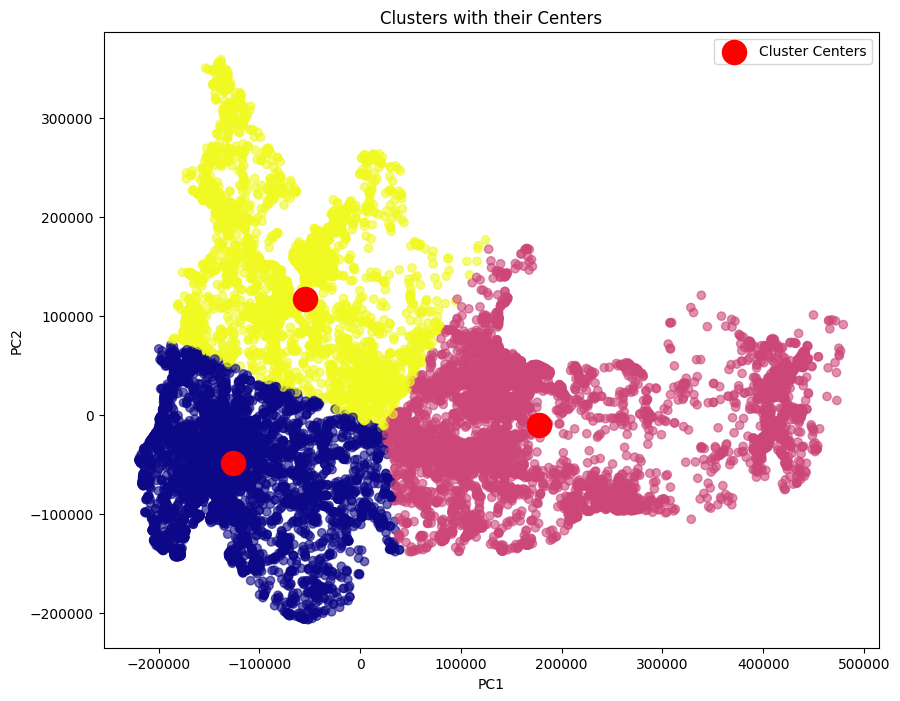

In [72]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='plasma', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters with their Centers')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

   Longitude, Latitude, Location_Easting_OSGR,Location_Northing_OSGR.
  هذه الميزات تعكس الموقع الجغرافي للحوادث، و هو الهدف الرئيسي من
 التحليل.

* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   3 clusters
determinnig by Elbow Method

* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   Silhouette Score
 لتقييم مدى تقارب النقاط داخل كل تجمع ومدى انفصالها عن التجمعات الأخرى

   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

   More of Data Cleaning and Preprocessing